In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import os


In [2]:
## Load the digits dataset: digits
digits = datasets.load_digits()

In [3]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [4]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


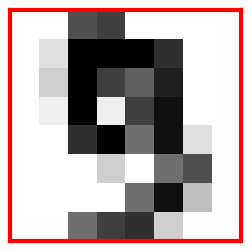

In [19]:

# 绘制0-9的图片
fig2 = plt.figure(figsize=(8, 4))
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    
    # 隐藏坐标轴的坐标值
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 设置边框的样式和宽度
    for spine in ax.spines.values():
        spine.set_linewidth(3)
        spine.set_color('red')
plt.savefig(f'./hw2/all.png')

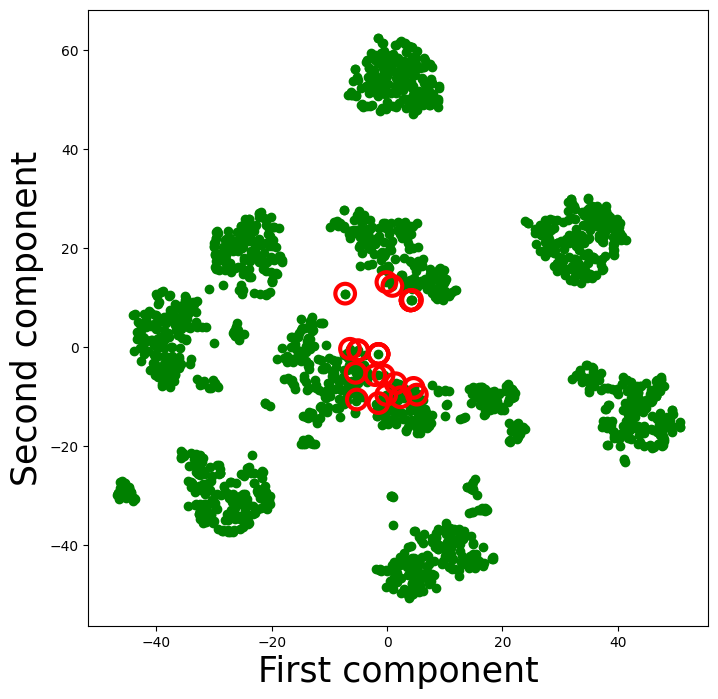

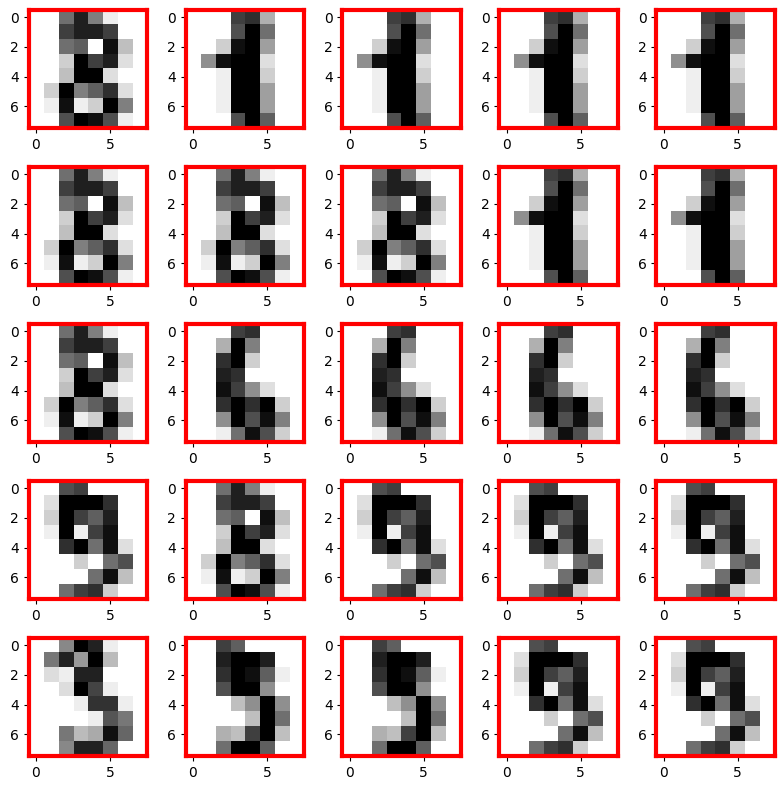

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap.umap_ import UMAP

method = ['pca', 'tsne', 'umap']
m = method[1]

# 获取数字为3的图片索引
digit_3_indices = np.where(digits.target == 3)[0]

# 提取数字为3的图片数据
digit_3_images = digits.data[digit_3_indices]


if m == 'pca':
    # 对数字为3的图片进行PCA降维
    pca = PCA(n_components=2)
    result = pca.fit_transform(digit_3_images)
    # 寻找二维平面上分布呈5x5矩阵样子的25个点
    min_x, max_x = -15, 20
    min_y, max_y = -15, 20

elif m == 'tsne':
    # 使用 t-SNE 进行降维和可视化
    tsne = TSNE(n_components=2, random_state=42)
    result = tsne.fit_transform(digit_3_images)
    
    min_x, max_x = -5, 5
    min_y, max_y = -10, 10
    
else:
    # 使用 UMAP 进行降维和可视化
    result = UMAP(n_neighbors=20, n_components=2, random_state=42).fit_transform(digit_3_images)
    
    min_x, max_x = -1, 5
    min_y, max_y = 13, 15


x_coords = np.linspace(min_x, max_x, num=5)
y_coords = np.linspace(min_y, max_y, num=5)

selected_indices = []
for y in y_coords:
    for x in x_coords:
        dist = np.linalg.norm(result - np.array([x, y]), axis=1)
        closest_idx = np.argmin(dist)
        selected_indices.append(closest_idx)

selected_indices = np.array(selected_indices)


# 绘制左子图，所有3可视化为绿色点
fig1 = plt.figure(figsize=(8, 8))
plt.scatter(result[:, 0], result[:, 1], c='green')
plt.scatter(result[selected_indices, 0], result[selected_indices, 1], 
            color='red', marker='o', facecolors='none', linewidth=3, s=200)
plt.xlabel('First component', fontsize=25)
plt.ylabel('Second component', fontsize=25)
plt.savefig(f'./hw2/{m}.png')

# 绘制右子图，挑选出来的25个点对应的3的图片按照空间位置绘制成5*5的图片矩阵
fig2 = plt.figure(figsize=(8, 8))
for i, idx in enumerate(selected_indices):
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(digits.images[digit_3_indices[idx]], cmap=plt.cm.gray_r, interpolation='nearest')
    # 设置边框的样式和宽度
    for spine in ax.spines.values():
        spine.set_linewidth(3)
        spine.set_color('red')

# 调整子图布局
plt.tight_layout()

plt.savefig(f'./hw2/{m}_selected_images.png')

# 显示图形
plt.show()

# 绘制全部数据的降维结果

E:\Anaconda\envs\Py310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


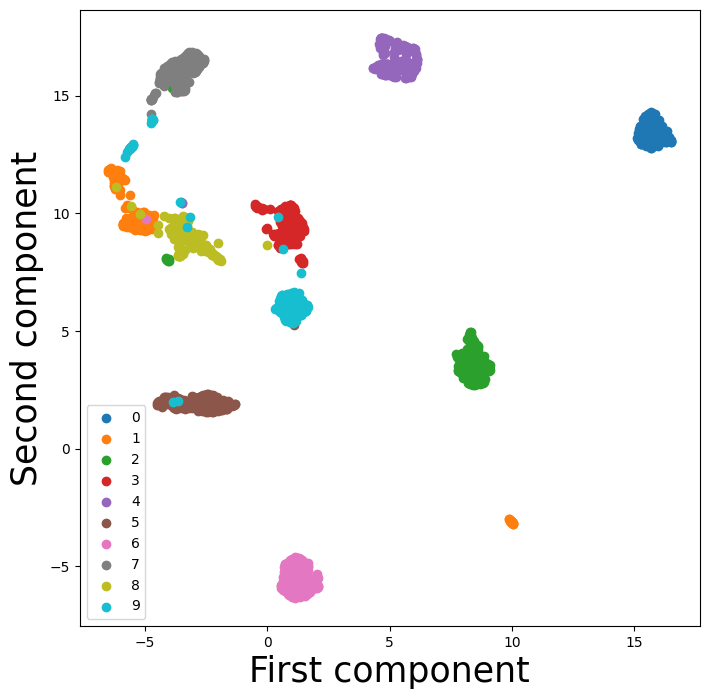

In [10]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap.umap_ import UMAP

method = ['pca', 'tsne', 'umap']
m = method[2]


digit_indices = digits.target
digit_images = digits.data


if m == 'pca':
    # 对数字为3的图片进行PCA降维
    pca = PCA(n_components=2)
    result = pca.fit_transform(digit_images)

elif m == 'tsne':
    # 使用 t-SNE 进行降维和可视化
    tsne = TSNE(n_components=2, random_state=42)
    result = tsne.fit_transform(digit_images)
    
else:
    # 使用 UMAP 进行降维和可视化
    result = UMAP(n_neighbors=20, n_components=2, random_state=42).fit_transform(digit_images)



# 10个不同的数字可视化为不同颜色的点
fig1 = plt.figure(figsize=(8, 8))
for i in range(10):
    plt.scatter(result[digit_indices == i, 0], result[digit_indices == i, 1], label=str(i))

plt.xlabel('First component', fontsize=25)
plt.ylabel('Second component', fontsize=25)
plt.legend()
plt.savefig(f'./hw2/{m}_all.png')


# 显示图形
plt.show()